# ***1️⃣Importation des bibliothéque nécessaire:***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# ***2️⃣Importation de dataset:***

In [2]:
df=pd.read_csv('fraud CSV.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [3]:
df.shape

(555719, 23)

In [4]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#### Voici une explication en bref de chaque colonne :

**Unnamed: 0** : Identifiant automatique de ligne (index).

**trans_date_trans_time** : Date et heure de la transaction.

**cc_num** : Numéro de carte bancaire (anonymisé).

**merchant** : Nom du commerçant.

**category** : Catégorie du commerçant (ex. : alimentation, transport...).

**amt** : Montant de la transaction.

**first** : Prénom du titulaire de la carte.

**last** : Nom du titulaire de la carte.

**gender** : Sexe du titulaire (M pour homme, F pour femme).

**street** : Adresse du titulaire.

**city** : Ville du titulaire.

**state** : État ou région du titulaire.

**zip** : Code postal.

**lat** : Latitude de l’adresse du titulaire.

**long** : Longitude de l’adresse du titulaire.

**city_pop** : Population de la ville du titulaire.

**job** : Profession du titulaire.

**dob** : Date de naissance.

**trans_num** : Identifiant unique de la transaction.

**unix_time** : Heure de la transaction au format UNIX (secondes depuis 1970).

**merch_lat** : Latitude du commerçant.

**merch_long** : Longitude du commerçant.

**is_fraud** : 1 si la transaction est frauduleuse, sinon 0.

# ***3️⃣Les informations pricipaux sur dataset🧮***

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df.shape

(555719, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
df['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [11]:
df['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

In [12]:
df['job'].value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

# ***4️⃣Data cleaning👨‍💻***

## Suppression des colonnes qui ne sont pas intéressantes:

In [13]:
df = df.drop(['Unnamed: 0', 'street','first','last', 'dob' ,'cc_num','merchant','unix_time','zip','long','lat','trans_num',"trans_date_trans_time"], axis=1)

In [14]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Traitment des valeurs manquants:

In [15]:
df.isnull().sum()

category      0
amt           0
gender        0
city          0
state         0
city_pop      0
job           0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

##  📉Visualisation des valeurs numerique

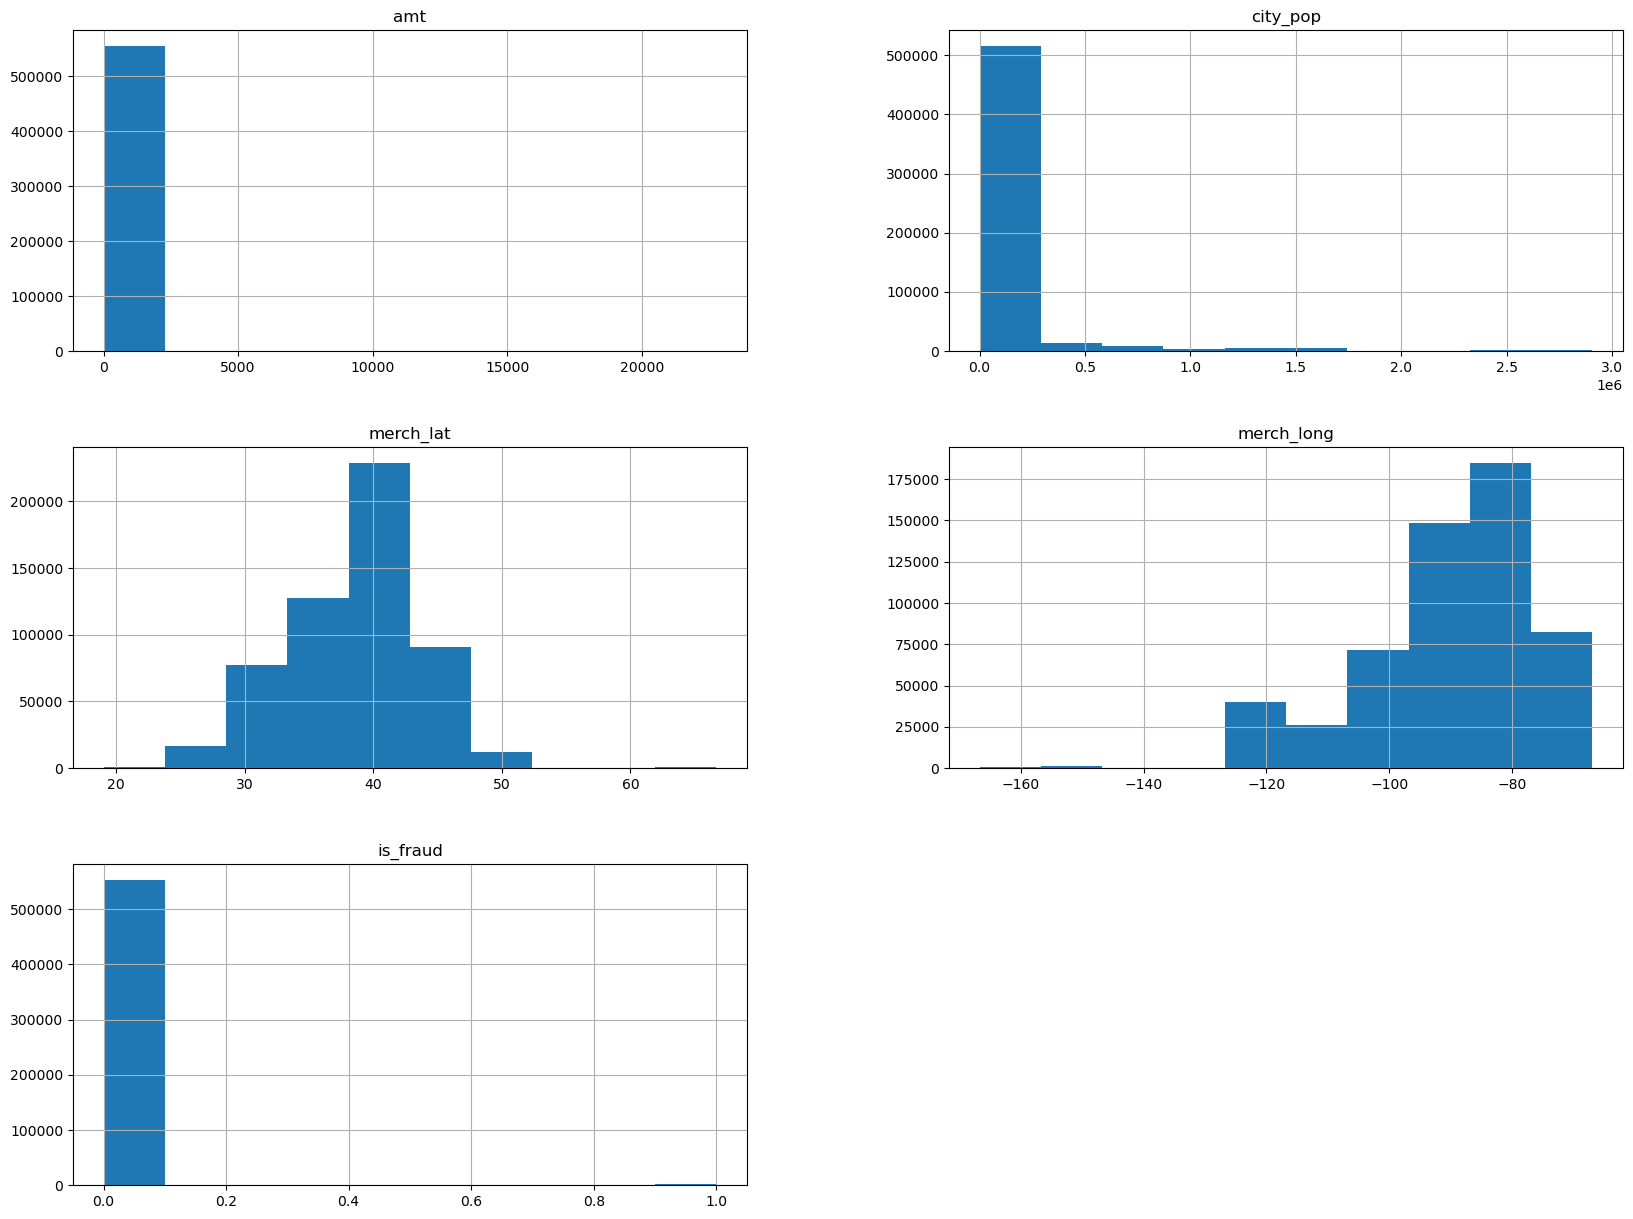

In [16]:
df.hist(figsize = (20,15))
plt.show()

# Outliers

<Axes: >

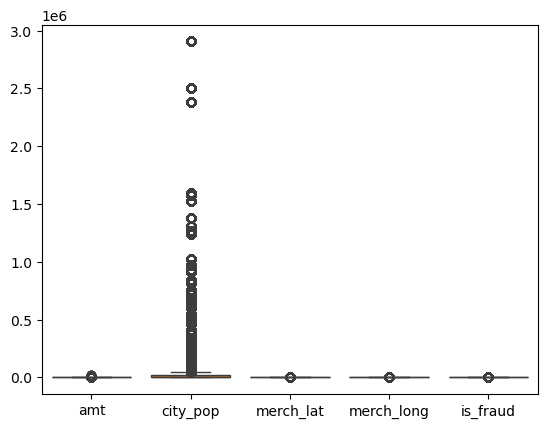

In [17]:
import seaborn as sns
sns.boxplot(data=df)


In [18]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    # print(f"Intervalle accepté pour {column}: [{lower_limit}, {upper_limit}]")
    print(f"Outliers détectés {column} : {len(outliers)}")

    
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df

def detect_all_outliers(df):
    for column in df.columns:  
        if df[column].dtype in ['int64', 'float64']:
            detect_outliers(df, column)

In [19]:
detect_all_outliers(df)

Outliers détectés amt : 27778
Outliers détectés city_pop : 104151
Outliers détectés merch_lat : 2090
Outliers détectés merch_long : 17926
Outliers détectés is_fraud : 2145


detect_all_outliers(df)

df = remove_outliers(df, 'amt')
df = remove_outliers(df, 'city_pop')
df = remove_outliers(df, 'merch_lat')
df = remove_outliers(df, 'merch_long')
df = remove_outliers(df, 'is_fraud')

In [20]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Traitement des valeurs doublans

In [21]:
df.duplicated().sum()

0

# ***5️⃣Data analyse🔍***

1. Combien de transactions au total et combien de fraudes ?

In [22]:
# Nombre total de transactions
total_tx = df.shape[0]

# Nombre de fraudes
nb_fraudes = df['is_fraud'].sum()

print(f"Total transactions : {total_tx}")
print(f"Transactions frauduleuses : {nb_fraudes} ({(nb_fraudes / total_tx * 100):.2f}%)")


Total transactions : 555719
Transactions frauduleuses : 2145 (0.39%)


 2. Quelles sont les catégories de marchands les plus touchées par la fraude ?

In [23]:
# Pourcentage de fraude par catégorie
fraude_par_categorie = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True) * 100

print(fraude_par_categorie.sort_values(ascending=False))


category
shopping_net      23.589744
grocery_pos       22.610723
misc_net          12.447552
shopping_pos       9.930070
gas_transport      7.179487
misc_pos           3.356643
personal_care      3.263403
home               3.123543
kids_pets          3.030303
entertainment      2.750583
food_dining        2.517483
health_fitness     2.424242
grocery_net        1.911422
travel             1.864802
Name: proportion, dtype: float64


 3. Le montant moyen d'une fraude est-il plus élevé que celui d'une transaction normale ?

In [24]:
# Moyenne des montants
moyenne_fraude = df[df['is_fraud'] == 1]['amt'].mean()
moyenne_normale = df[df['is_fraud'] == 0]['amt'].mean()

print(f"Montant moyen fraude : {moyenne_fraude:.2f}")
print(f"Montant moyen normal : {moyenne_normale:.2f}")


Montant moyen fraude : 528.36
Montant moyen normal : 67.61


4. La fraude dépend-elle du genre (gender) ?

In [25]:
# Taux de fraude par genre
fraude_par_genre = df.groupby('gender')['is_fraud'].mean() *100
print(fraude_par_genre)


gender
F    0.381782
M    0.391097
Name: is_fraud, dtype: float64


5. Répartition des transactions frauduleuses par état (state)

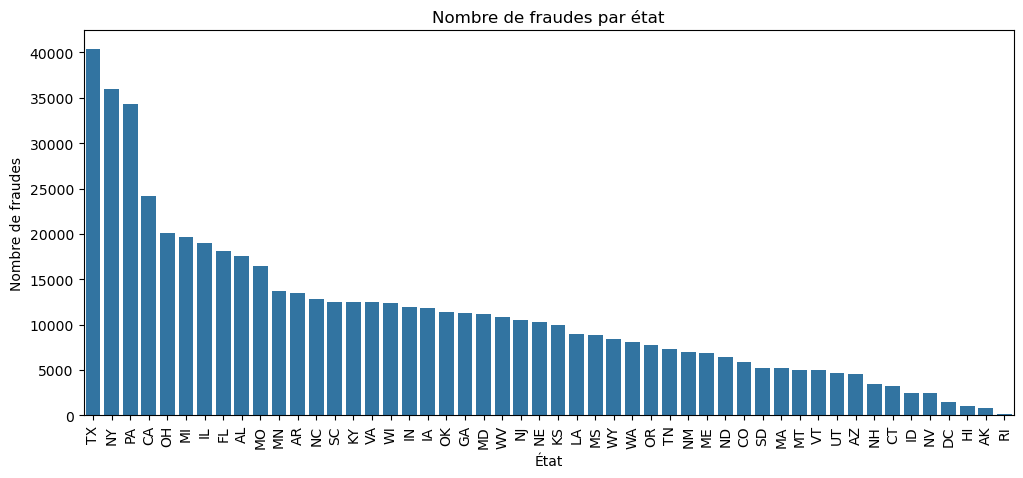

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(data=df[df['is_fraud'] <= 1], x='state', order=df['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Nombre de fraudes par état")
plt.xlabel("État")
plt.ylabel("Nombre de fraudes")
plt.show()


6. Fraudes selon la population de la ville ?

In [27]:
df

,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,SC,333497,Mechanical engineer,33.986391,-81.200714,0
1,personal_care,29.84,F,Altonah,UT,302,"Sales professional, IT",39.450498,-109.960431,0
2,health_fitness,41.28,F,Bellmore,NY,34496,"Librarian, public",40.495810,-74.196111,0
3,misc_pos,60.05,M,Titusville,FL,54767,Set designer,28.812398,-80.883061,0
4,travel,3.19,M,Falmouth,MI,1126,Furniture designer,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,M,Luray,MO,519,Town planner,39.946837,-91.333331,0
555715,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,29.661049,-96.186633,0
555716,kids_pets,86.88,F,Burbank,WA,3684,Musician,46.658340,-119.715054,0
555717,travel,7.99,M,Mesa,ID,129,Cartographer,44.470525,-117.080888,0


In [28]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [29]:
df

,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,SC,333497,Mechanical engineer,33.986391,-81.200714,0
1,personal_care,29.84,F,Altonah,UT,302,"Sales professional, IT",39.450498,-109.960431,0
2,health_fitness,41.28,F,Bellmore,NY,34496,"Librarian, public",40.495810,-74.196111,0
3,misc_pos,60.05,M,Titusville,FL,54767,Set designer,28.812398,-80.883061,0
4,travel,3.19,M,Falmouth,MI,1126,Furniture designer,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,M,Luray,MO,519,Town planner,39.946837,-91.333331,0
555715,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,29.661049,-96.186633,0
555716,kids_pets,86.88,F,Burbank,WA,3684,Musician,46.658340,-119.715054,0
555717,travel,7.99,M,Mesa,ID,129,Cartographer,44.470525,-117.080888,0


## Encodage des variables catégorielles avec LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df[['category']])
df['gender'] = encoder.fit_transform(df[['gender']])
df['job'] = encoder.fit_transform(df[['job']])
df['state'] = encoder.fit_transform(df[['state']])
df['city'] = encoder.fit_transform(df[['city']])


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_



+ Ce code transforme les variables catégorielles (comme `category`, `gender`, etc.) en valeurs numériques à l’aide de `LabelEncoder`, pour les rendre exploitables par les modèles de Machine Learning.



## Matrice de corrélation entre les variables

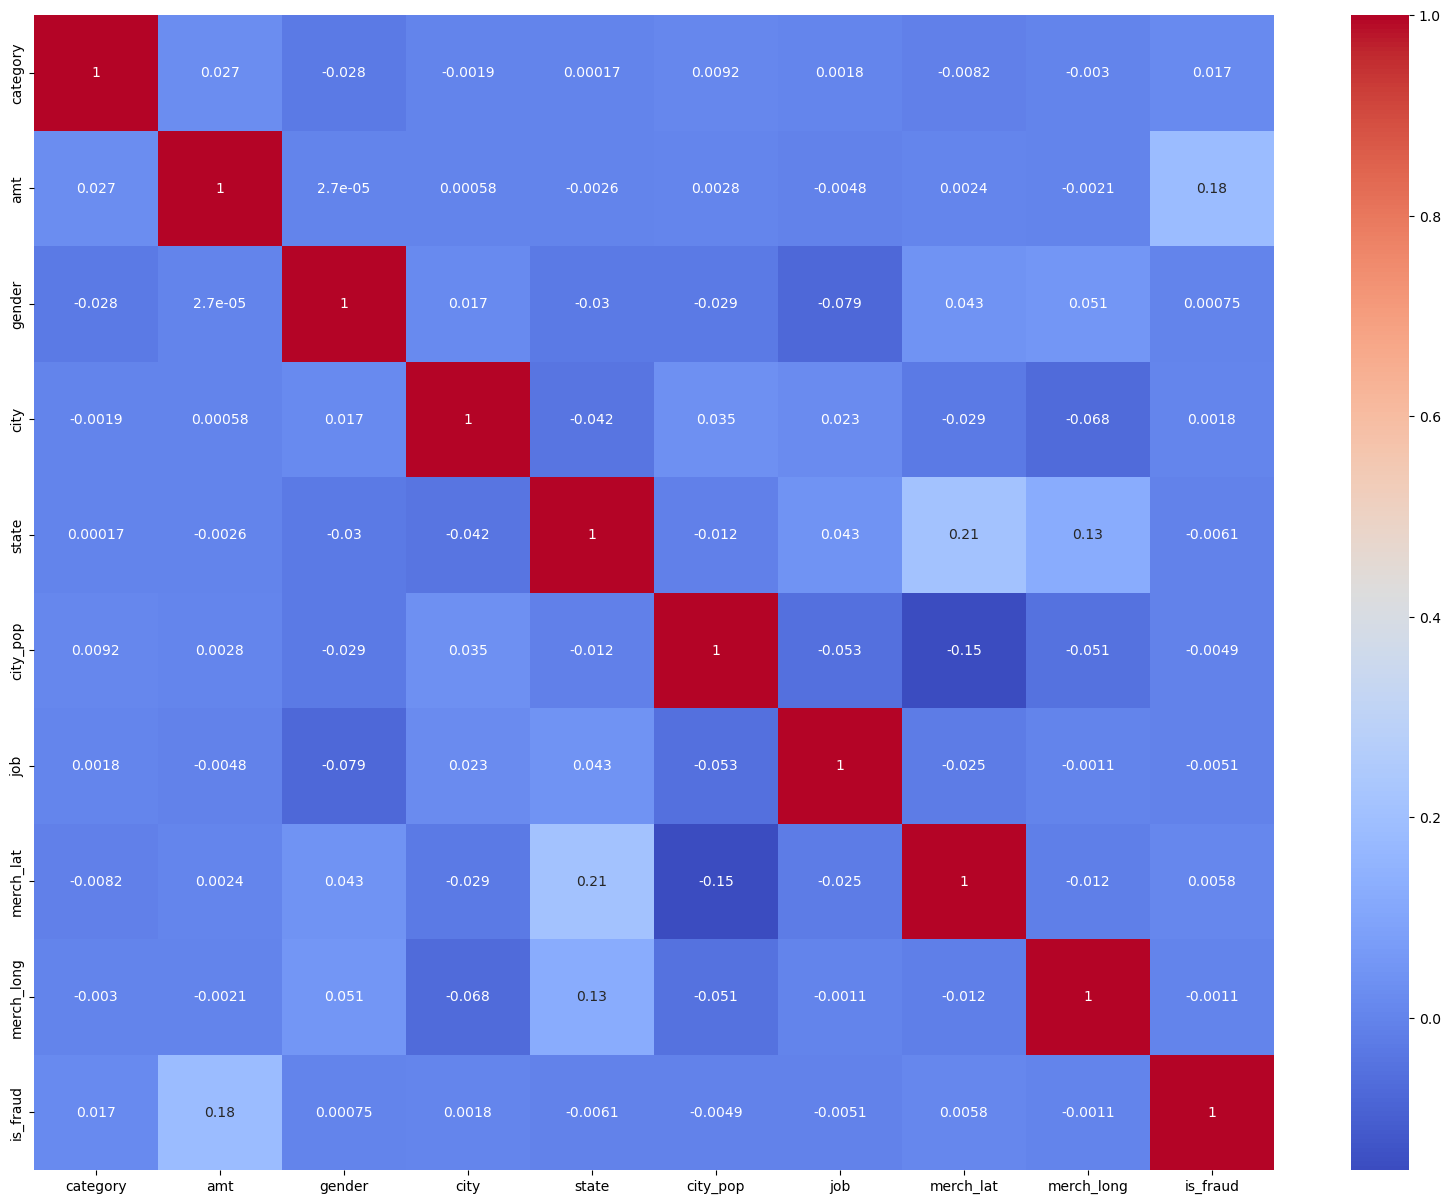

In [31]:
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



+ Ce code génère une heatmap pour visualiser les corrélations entre les variables du dataset, ce qui aide à détecter les relations fortes ou redondantes.




 ## Analyse des classes cibles (is_fraud)

In [32]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Séparation des variables explicatives et de la variable cible

In [33]:
x =  df.drop(columns=['is_fraud'])
y = df['is_fraud']

+ Ce code sert à séparer les données en deux parties : `x` contient les variables 
 explicatives (features)
* `y` contient la variable cible `is_fraud`
 utilisée pour l'apprentissage supervisé

In [34]:
x

,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long
0,10,2.86,1,157,39,333497,275,33.986391,-81.200714
1,10,29.84,0,16,43,302,392,39.450498,-109.960431
2,5,41.28,0,61,33,34496,259,40.495810,-74.196111
3,9,60.05,1,764,8,54767,407,28.812398,-80.883061
4,13,3.19,1,247,21,1126,196,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,443,23,519,460,39.946837,-91.333331
555715,7,111.84,1,401,42,28739,198,29.661049,-96.186633
555716,7,86.88,0,104,46,3684,294,46.658340,-119.715054
555717,13,7.99,1,476,12,129,58,44.470525,-117.080888


+ Afficher le DataFrame x, qui contient toutes les variables indépendantes utilisées pour entraîner le modèle, à l’exception de la variable cible

## Traitement du déséquilibre des classes avec SMOTE

In [35]:
# Align x and y to ensure they have the same indices
from imblearn.over_sampling import SMOTE
x, y = x.align(y, join='inner', axis=0)
smote = SMOTE()
x_res, y_res = smote.fit_resample(x, y)



+ Ce code utilise SMOTE pour générer des exemples synthétiques et équilibrer les classes de `is_fraud`.
* L'alignement entre `x` et `y` assure une bonne correspondance avant le rééchantillonnage.




## Division du jeu de données en ensemble d’entraînement et de test

In [36]:

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (885718, 9), Test size: (221430, 9)




+ On divise les données équilibrées en 80% pour l’entraînement et 20% pour le test afin d’évaluer les performances du modèle.




## Normalisation des donnes

In [37]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Partier superviser

 ## LogisticRegression

accuracy: 0.8433681073025335
F1_score: 0.8423143895903182
              precision    recall  f1-score   support

           0       0.79      0.93      0.86    110422
           1       0.91      0.76      0.83    111008

    accuracy                           0.84    221430
   macro avg       0.85      0.84      0.84    221430
weighted avg       0.85      0.84      0.84    221430



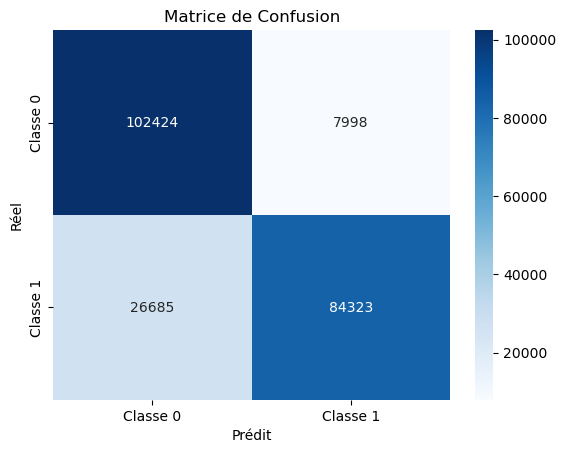

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

# F1 score du modèle
f1 = f1_score(y_test, y_pred, average='macro')
print("F1_score:",f1)

# classification_repport
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()



* Le modèle de régression logistique a obtenu une **accuracy de 84,3 %** et un **F1-score macro de 84,2 %**. La matrice de confusion montre qu’il a bien détecté la majorité des transactions normales (102 424) et frauduleuses (84 323). Cependant, il a manqué 26 685 fraudes (faux négatifs) et a classé à tort 7 998 transactions normales comme frauduleuses (faux positifs). Malgré ces erreurs, les performances globales du modèle restent satisfaisantes.



## KNN

Modèle KNN entraîné avec k=75.
Précision du modèle KNN: 0.97
F1-score du modèle KNN: 0.97
              precision    recall  f1-score   support

    Classe 0       0.98      0.95      0.97    110422
    Classe 1       0.95      0.98      0.97    111008

    accuracy                           0.97    221430
   macro avg       0.97      0.97      0.97    221430
weighted avg       0.97      0.97      0.97    221430



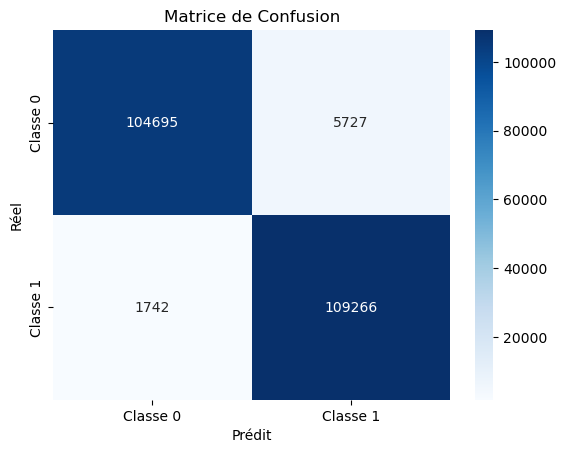

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Définition du modèle KNN avec k=5

k = 75

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"Modèle KNN entraîné avec k={k}.")

# Évaluation du Modèle

# Prédictions sur les données de test
y_pred_knn = knn.predict(X_test)

# Calcul de l'accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Précision du modèle KNN: {accuracy_knn:.2f}")
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-score du modèle KNN: {f1_knn:.2f}")

target_names = ['Classe 0', 'Classe 1']
#  print("Rapport de classification :")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

# Matrice de confusion
conf_matrix_KNN = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

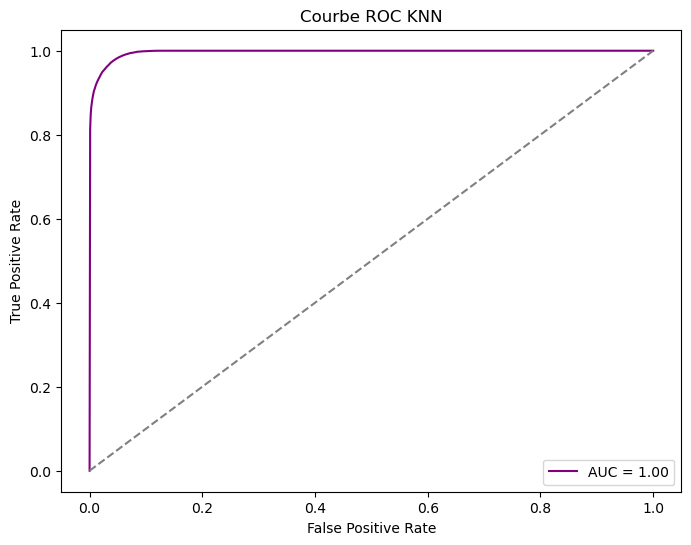

In [45]:

# Calcul de la courbe ROC
y_scores1 = knn.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='purple', label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC KNN')
plt.legend()
plt.show()




* Le modèle KNN, entraîné avec **k = 75**, a obtenu une **précision (accuracy) de 97 %** et un **F1-score de 97 %**, ce qui indique une excellente performance. D’après la matrice de confusion, il a correctement détecté **104 695 transactions normales** et **109 266 transactions frauduleuses**. Seulement **1 742 fraudes** ont été manquées, et **5 727 transactions normales** ont été classées à tort comme frauduleuses.

* De plus, **la courbe ROC** du modèle montre une **AUC de 100 %**, ce qui signifie qu’il est capable de distinguer parfaitement entre les transactions frauduleuses et non frauduleuses. Cela confirme que le modèle est **très performant et fiable** dans ce contexte.




## DecisionTree

Précision du modèle : 0.90
F1-score du modèle : 0.91


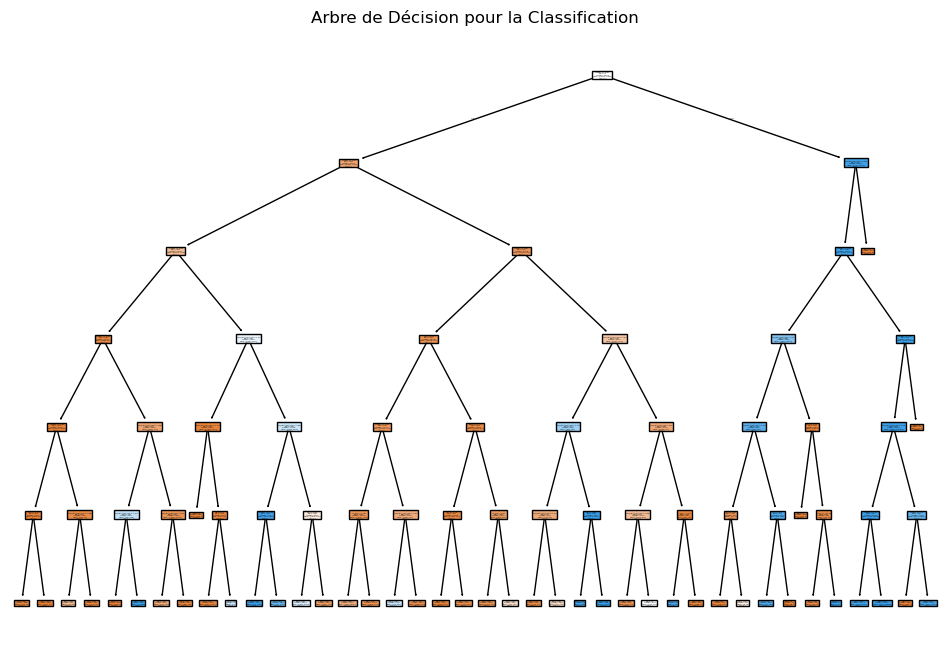

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Création et entraînement du modèle Decision Tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
dt.fit(X_train, y_train)

# Prédiction sur les données test
y_pred_dt = dt.predict(X_test)

# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Précision du modèle : {accuracy_dt:.2f}")
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1-score du modèle : {f1_dt:.2f}")

# Visualisation de l’arbre de décision
plt.figure(figsize=(12, 8))
tree.plot_tree(
    dt, 
    filled=True, 
    feature_names=df.drop(columns=['is_fraud']).columns,  # Utilisation des noms des features
    class_names=y_train.unique().astype(str) )
plt.title("Arbre de Décision pour la Classification")
plt.show()

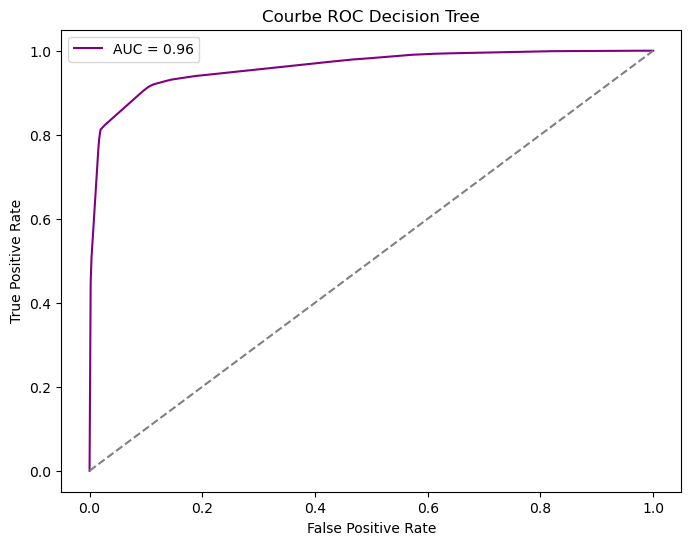

In [47]:

# Calcul de la courbe ROC
y_scores2 = dt.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='purple', label=f'AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Decision Tree')
plt.legend()
plt.show()




* Le modèle **Decision Tree**, entraîné avec une profondeur maximale de 6, a obtenu une **précision de 90 %** et un **F1-score de 91 %**, ce qui montre une bonne capacité à prédire correctement les fraudes. La courbe ROC affiche une **AUC de 96 %**, ce qui confirme que le modèle distingue bien entre les transactions frauduleuses et normales.

* L’arbre de décision a également été visualisé pour mieux comprendre les règles de classification prises par le modèle. Cela permet une meilleure interprétation du processus de décision, ce qui est un avantage important pour l’explicabilité du modèle.



## Random forest

Précision du modèle Random Forest : 1.00
F1-score du modèle Random Forest : 1.00
Rapport de classification :
              precision    recall  f1-score   support

    Classe 0       1.00      0.99      1.00    110422
    Classe 1       0.99      1.00      1.00    111008

    accuracy                           1.00    221430
   macro avg       1.00      1.00      1.00    221430
weighted avg       1.00      1.00      1.00    221430



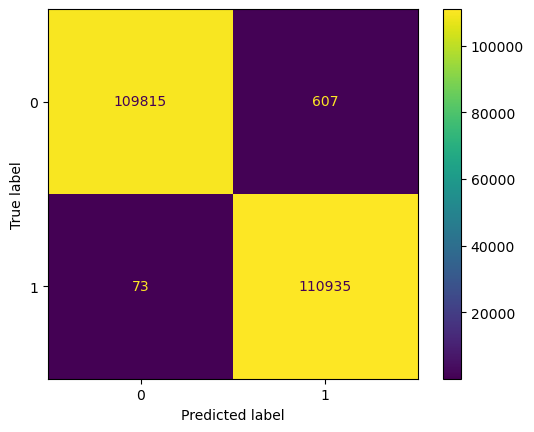

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Définition et entraînement du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Précision du modèle Random Forest : {accuracy_rf:.2f}")
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-score du modèle Random Forest : {f1_rf:.2f}")

# Rapport de classification
target_names = ['Classe 0', 'Classe 1']
print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()



* Le modèle **Random Forest** a montré une performance exceptionnelle, avec une **précision (accuracy) de 100 %** et un **F1-score de 100 %**. D’après le rapport de classification, il a très bien détecté les transactions normales (Classe 0) avec un **rappel de 99 %**, et presque toutes les fraudes (Classe 1) avec un **rappel de 100 %**.

* La matrice de confusion confirme que  le modèle a correctement prédit 109 815 cas négatifs et 110 935 cas positifs, avec seulement 607 faux positifs et 73 faux négatifs, ce qui montre une très grande précision. Le taux de précision globale (accuracy) atteint environ 99,69 %, ce qui signifie que le modèle donne presque toujours la bonne réponse

## Évaluation du surapprentissage à l’aide de la validation 

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Moyenne:", scores.mean())


Cross-validation scores: [0.99734579 0.99714784 0.99744476 0.99747175 0.99738175]
Moyenne: 0.9973583772074992





* Pour vérifier la présence d’un éventuel surapprentissage (overfitting), nous avons utilisé la méthode de validation croisée avec 5 plis (`cv=5`) sur un modèle **RandomForestClassifier**. Les scores de précision obtenus sur les différentes partitions sont très proches les uns des autres, variant entre 99,71 % et 99,74 %, avec une moyenne de **99,74 %**. Cette stabilité dans les résultats montre que le modèle généralise bien sur l’ensemble des données et n’est pas simplement en train de mémoriser les exemples d’entraînement. Ainsi, on peut conclure qu’il **n’y a pas de surapprentissage**, et que le modèle est fiable et robuste.



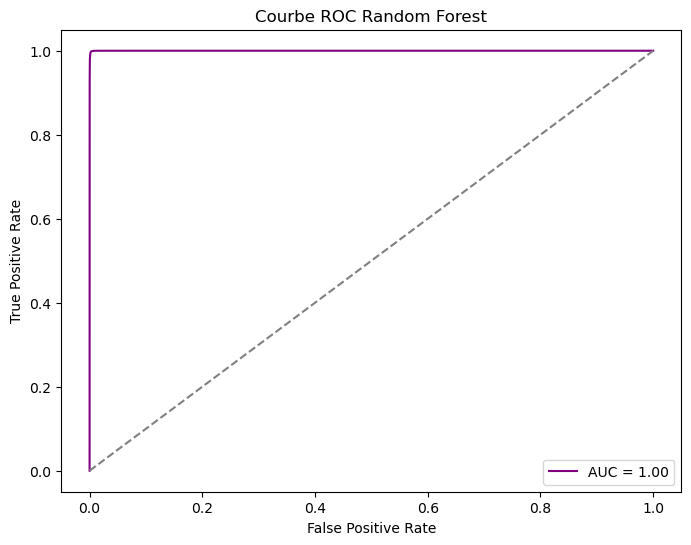

In [50]:

# Calcul de la courbe ROC


y_scores3 = rf.predict_proba(X_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, y_scores3)
roc_auc3 = auc(fpr3, tpr3)


# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='purple', label=f'AUC = {roc_auc3:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Random Forest')
plt.legend()
plt.show()


## SVM

Accuracy: 0.84
F1 Score: 0.84
              precision    recall  f1-score   support

           0       0.78      0.94      0.86    110422
           1       0.93      0.74      0.82    111008

    accuracy                           0.84    221430
   macro avg       0.86      0.84      0.84    221430
weighted avg       0.86      0.84      0.84    221430



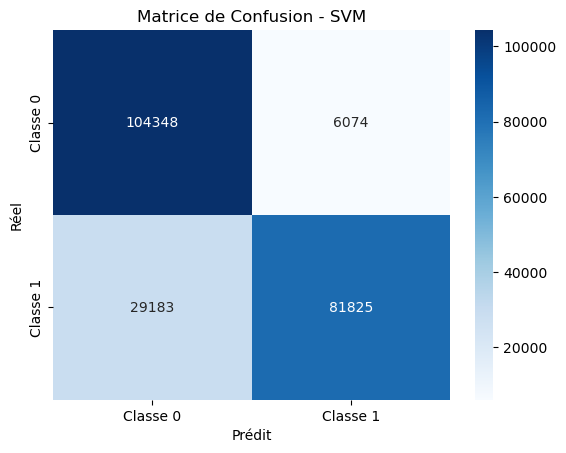

In [ ]:
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42, max_iter=10000)
svm.fit(X_train, y_train)

svm.fit(X_train, y_train)
# Prédiction
y_pred_svm = svm.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# F1-score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1_svm:.2f}")

# Rapport de classification
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
conf_matrix5 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - SVM')
plt.show()

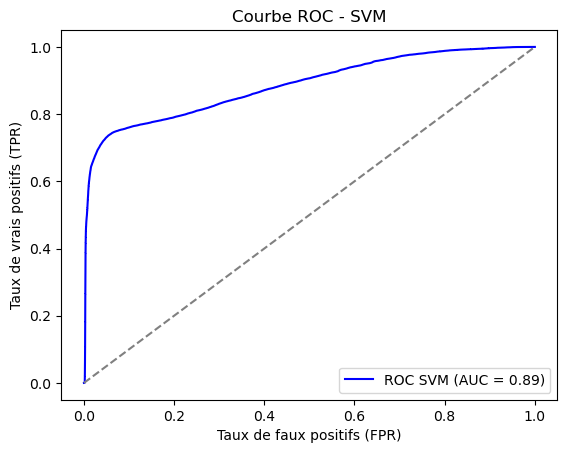

In [54]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=42, max_iter=10000)
svm.fit(X_train, y_train)
y_scores4 = svm.decision_function(X_test)
fpr4, tpr4, _ = roc_curve(y_test, y_scores4)
roc_auc4 = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='blue', label=f'ROC SVM (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend(loc='lower right')
plt.show()




* Nous avons opté pour l'utilisation du **modèle LinearSVC** en raison de la **taille importante de notre jeu de données**. Contrairement au SVC classique, qui devient lent avec un grand volume de données, LinearSVC repose sur l’algorithme **liblinear**, optimisé pour un entraînement rapide
* Les résultats obtenus montrent une **bonne performance globale** avec une **accuracy de 84 %**, un **F1-score de 0.84**, et un **score ROC de 0.89**, indiquant une bonne capacité du modèle à distinguer entre les deux classes. La **Classe 0** est bien reconnue, tandis que la **Classe 1** présente encore un taux élevé de **faux négatifs (\~26 %)**, ce qui pourrait poser problème dans des contextes sensibles comme la **détection de fraude**.




## Comparaison de Modèles 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
models = {
    "KNN": KNeighborsClassifier(n_neighbors=75),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42),
    "SVM": LinearSVC(random_state=42, max_iter=10000),
    "Random Forest1": RandomForestClassifier(n_estimators=100,random_state=42),
    "Logistic Regression": LogisticRegression()
}

# 4. Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  
    print(f"{name}:\n  Accuracy: {acc:.2f}\n  F1 Score: {f1:.2f}\n")

KNN:
  Accuracy: 0.97
  F1 Score: 0.97

Decision Tree:
  Accuracy: 0.93
  F1 Score: 0.93

SVM:
  Accuracy: 0.84
  F1 Score: 0.84

Random Forest1:
  Accuracy: 1.00
  F1 Score: 1.00

Logistic Regression:
  Accuracy: 0.84
  F1 Score: 0.84



* Le **modèle Random Forest** a obtenu les meilleures performances avec une précision et un F1-score de 100 %, suivi du KNN avec 97 %, puis de l’Arbre de Décision avec une précision de 93 %.

* Les modèles SVM et Régression Logistique ont également montré de bonnes performances, avec une précision moyenne d’environ 84 %.

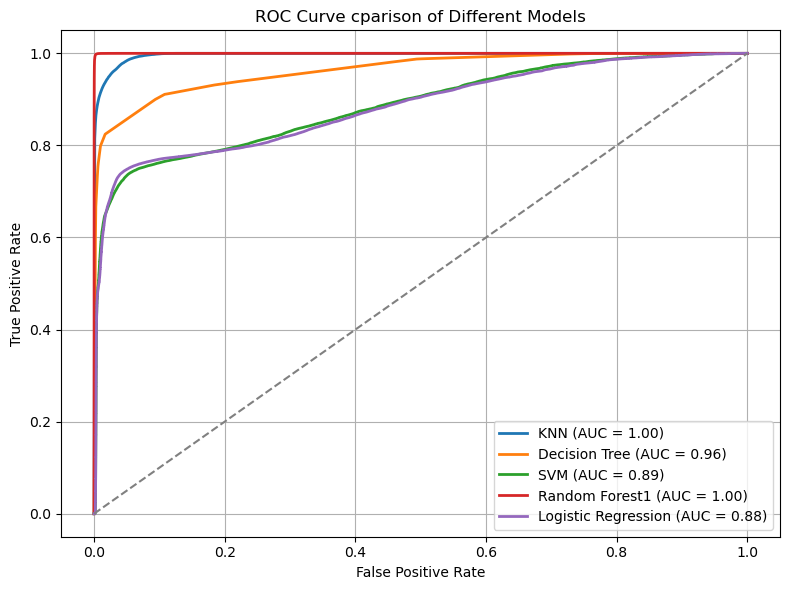

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=75),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42),
    "SVM": LinearSVC(random_state=42, max_iter=10000),
    "Random Forest1": RandomForestClassifier(n_estimators=100,random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200 , C=1.0)
}



# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve cparison of Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


* Le graphique ci-dessus illustre la comparaison des courbes ROC de plusieurs modèles de classification. Le Random Forest et le KNN se distinguent par une valeur AUC (Area Under Curve) parfaite de 1.00, indiquant une capacité exceptionnelle à distinguer entre les classes positives et négatives.

* Le modèle Decision Tree affiche également une très bonne performance avec une AUC de 0.96, tandis que le SVM et la Régression Logistique présentent des AUC plus modestes de 0.89 et 0.88 respectivement.

* Ces résultats confirment que le modèle Random Forest est le plus performant, suivi de près par le KNN et l’Arbre de Décision, tant en termes de précision globale que de capacité de discrimination selon la courbe ROC

### Sélection des 5 meilleures caractéristiques avec la méthode f_classif

In [ ]:




from sklearn.feature_selection import SelectKBest, f_classif  
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)




In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models_slc = {
    "KNN": KNeighborsClassifier(n_neighbors=75),
    "SVM": LinearSVC(random_state=42, max_iter=30000),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42),
    "Random Forest1": RandomForestClassifier(n_estimators=100,random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=4200 , C=1.0)
}
for name, model in models_slc.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  
    print(f"{name}:\n  Accuracy: {acc:.2f}\n  F1 Score: {f1:.2f}\n")

KNN:
  Accuracy: 0.93
  F1 Score: 0.93

SVM:
  Accuracy: 0.84
  F1 Score: 0.84

Decision Tree:
  Accuracy: 0.90
  F1 Score: 0.90

Random Forest1:
  Accuracy: 0.98
  F1 Score: 0.98

Logistic Regression:
  Accuracy: 0.85
  F1 Score: 0.84



* Après application de la méthode de sélection de caractéristiques SelectKBest avec la fonction f_classif pour retenir les 5 features les plus pertinentes, nous avons observé une légère baisse des performances pour certains modèles. En effet, la précision et le score F1 du KNN sont passés de 97 % à 93 %, et ceux de l’arbre de décision ont diminué de 93 % à 90 %.

* Le modèle Random Forest a également montré une petite baisse, passant de 100 % à 98 %. En revanche, les performances du SVM et de la régression logistique sont restées stables autour de 84 %. Cette sélection permet de réduire la complexité du modèle et d’éviter un éventuel sur-apprentissage, tout en conservant une bonne précision globale. Ces résultats suggèrent que, bien que la réduction du nombre de caractéristiques puisse affecter légèrement la performance

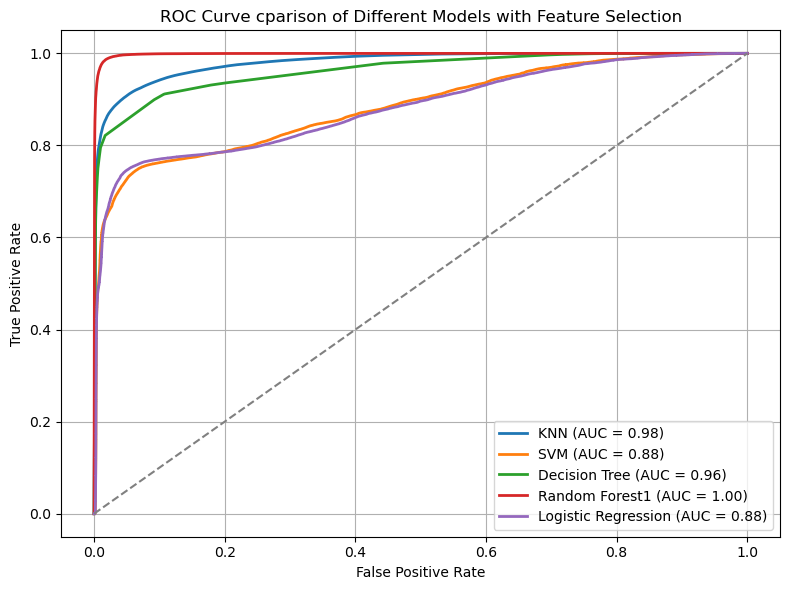

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models_slc.items():
    model.fit(X_train_selected, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_selected)[:, 1]
    else:
        y_prob = model.decision_function(X_test_selected)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
       
    roc_auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve cparison of Different Models with Feature Selection')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

##  Evaluation des Modèles par Validation Croisée

### Logistic Regression

In [63]:
from sklearn.model_selection import cross_val_score
model=models["Logistic Regression"]
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.8442224280395092
Average accuracy: 0.8442224280395092


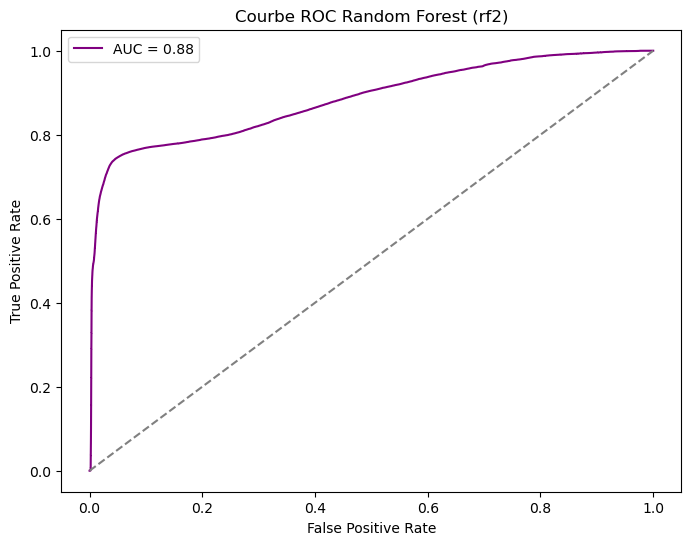

In [65]:
## roc
from sklearn.metrics import roc_curve, auc

# Calcul de la courbe ROC
y_scores5 = model.predict_proba(X_test_selected)[:, 1]
fpr5, tpr5, _ = roc_curve(y_test, y_scores5)
roc_auc5 = auc(fpr5, tpr5)
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='purple', label=f'AUC = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Random Forest (rf2)')
plt.legend()
plt.show()



## KNN

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.9628470915780145
Average accuracy: 0.9628470915780145


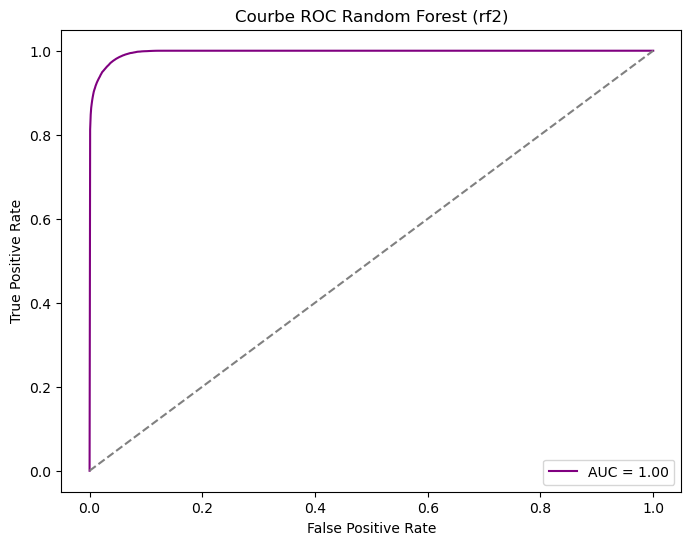

In [67]:
## roc
from sklearn.metrics import roc_curve, auc

# Calcul de la courbe ROC
y_scores5 = knn.predict_proba(X_test)[:, 1]
fpr5, tpr5, _ = roc_curve(y_test, y_scores5)
roc_auc5 = auc(fpr5, tpr5)
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='purple', label=f'AUC = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Random Forest (rf2)')
plt.legend()
plt.show()



### Decision tree

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.9055094288956356
Average accuracy: 0.9055094288956356


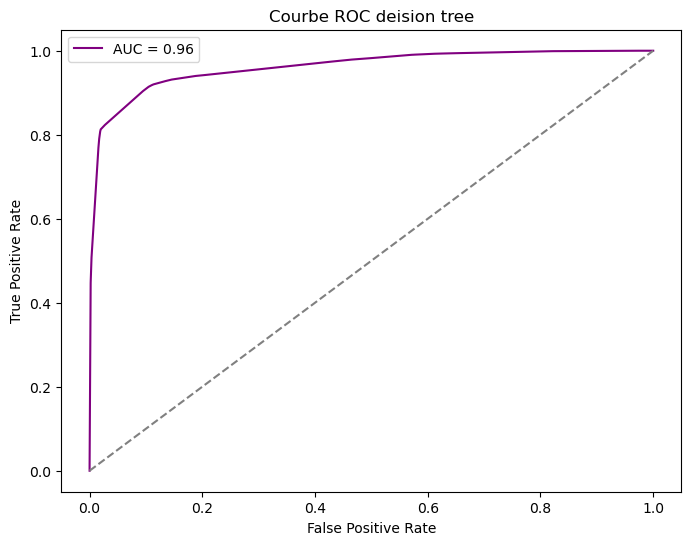

In [69]:
## roc
from sklearn.metrics import roc_curve, auc

# Calcul de la courbe ROC
y_scores5 = dt.predict_proba(X_test)[:, 1]
fpr5, tpr5, _ = roc_curve(y_test, y_scores5)
roc_auc5 = auc(fpr5, tpr5)
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='purple', label=f'AUC = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC deision tree')
plt.legend()
plt.show()



### Random forest

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier()
scores = cross_val_score(rf2, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Moyenne:", scores.mean())


Cross-validation scores: [0.99725581 0.99717484 0.99725581 0.99747175 0.99743574]
Moyenne: 0.9973187890227739


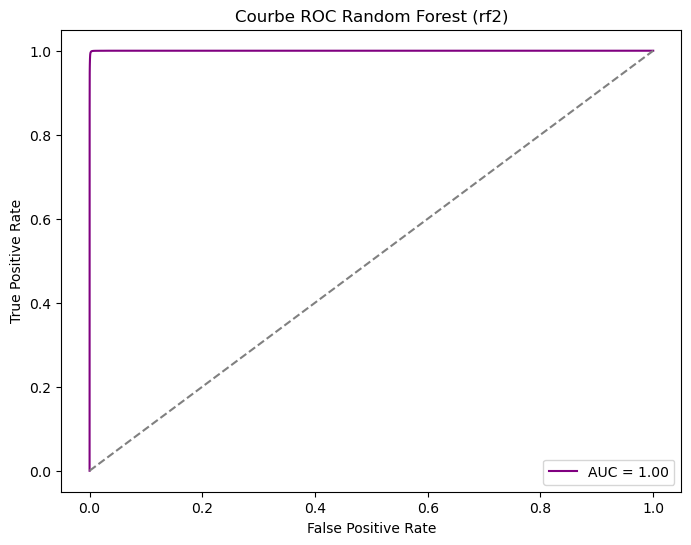

In [34]:
## roc
from sklearn.metrics import roc_curve, auc

# Fit rf2 before using it
rf2.fit(X_train, y_train)

# Calcul de la courbe ROC
y_scores5 = rf2.predict_proba(X_test)[:, 1]
fpr5, tpr5, _ = roc_curve(y_test, y_scores5)
roc_auc5 = auc(fpr5, tpr5)
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='purple', label=f'AUC = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Random Forest (rf2)')
plt.legend()
plt.show()



## SVM

In [36]:
from sklearn.model_selection import cross_val_score 
from sklearn.svm import LinearSVC
svm= LinearSVC(random_state=42, max_iter=10000)
scores = cross_val_score(svm, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())


0.8418796971202166
Average accuracy: 0.8418796971202166


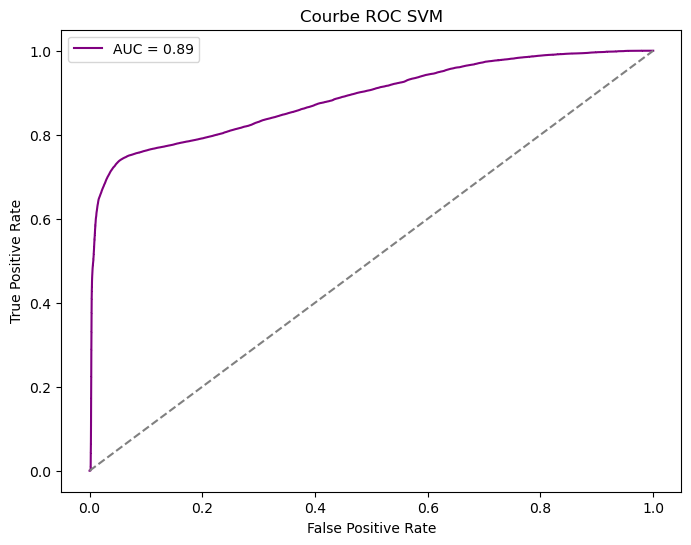

In [38]:
## roc
from sklearn.metrics import roc_curve, auc

# Fit svm if not already fitted
try:
	y_scores5 = svm.decision_function(X_test)
except Exception as e:
	svm.fit(X_train, y_train)
	y_scores5 = svm.decision_function(X_test)

fpr5, tpr5, _ = roc_curve(y_test, y_scores5)
roc_auc5 = auc(fpr5, tpr5)
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='purple', label=f'AUC = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC SVM')
plt.legend()
plt.show()



## Enregistrement du modele

In [44]:
import pickle
# save the model to disk
with open('Random Forest', 'wb') as file:
    pickle.dump(rf, file)


In [45]:
with open('Random Forest', 'rb') as file:
# load the model from disk
    loaded_model = pickle.load(file)

## Conclusion Finale avant deployement du modele

Dans ce projet, plusieurs algorithmes de classification ont été testés 
 Le modèle de  (Random Forest) s’est distingué comme le meilleur modèle en termes de performance, ayant atteint une précision (Accuracy) et un score F1 de 100%, ainsi qu’un AUC de 1,00 sur la courbe ROC, ce qui indique sa grande capacité à discriminer entre les classes. De plus, les résultats de la validation croisée (Cross-Validation) ont confirmé sa stabilité, avec une précision moyenne de 99,73%.

Le modèle KNN a également montré une excellente performance, avec une Accuracy de 97% et un AUC de 1,00, suivi par l’arbre de décision (Decision Tree) qui a obtenu un AUC de 0,96 et une précision de 93%. Quant aux SVM et à la régression logistique (Logistic Regression), ils ont affiché des performances moindres par rapport aux autres modèles, avec des AUC respectifs de 0,89 et 0,88, et une précision de 84% chacun.

Sur la base de ces résultats, le modèle Random Forest peut être considéré comme le meilleur choix pour résoudre le problème de classification traité dans ce projet, que ce soit en termes de précision, de stabilité ou de capacité à distinguer les différentes classes.

## Deploiement du model 

* Lien de flask app :
* Lien de kaggle:

##  PARTIE NON SUPERVISER

In [357]:
df

,trans_date_trans_time,category,amt,gender,city,state,city_pop,job,merch_lat,merch_long,is_fraud
0,0,10,2.86,1,157,39,333497,275,33.986391,-81.200714,0
1,1,10,29.84,0,16,43,302,392,39.450498,-109.960431,0
2,2,5,41.28,0,61,33,34496,259,40.495810,-74.196111,0
3,3,9,60.05,1,764,8,54767,407,28.812398,-80.883061,0
4,4,13,3.19,1,247,21,1126,196,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,544755,5,43.77,1,443,23,519,460,39.946837,-91.333331,0
555715,544756,7,111.84,1,401,42,28739,198,29.661049,-96.186633,0
555716,544757,7,86.88,0,104,46,3684,294,46.658340,-119.715054,0
555717,544758,13,7.99,1,476,12,129,58,44.470525,-117.080888,0


#  Application de l'Algorithme KMeans

In [29]:
x.shape

(555719, 9)

In [30]:

data_sample = x.sample(n=100000, random_state=42)




* Étant donné que la taille initiale de notre base de données était très importante (555 719 lignes), nous avons choisi de réduire l’échantillon à 100 000 lignes en utilisant un échantillonnage aléatoire . 

* Cette démarche nous a permis d’accélérer le processus d’entraînement de nos modèles et de diminuer le temps de calcul, car travailler avec un dataset très volumineux entraîne souvent une lenteur des traitements et une consommation élevée des ressources informatiques. De plus, l’échantillon sélectionné est suffisamment représentatif de la diversité des données, ce qui nous a permis de construire un modèle précis et performant sans avoir à traiter l’intégralité des données.



### Choisir le bon nombre de clusters (méthode du coude)

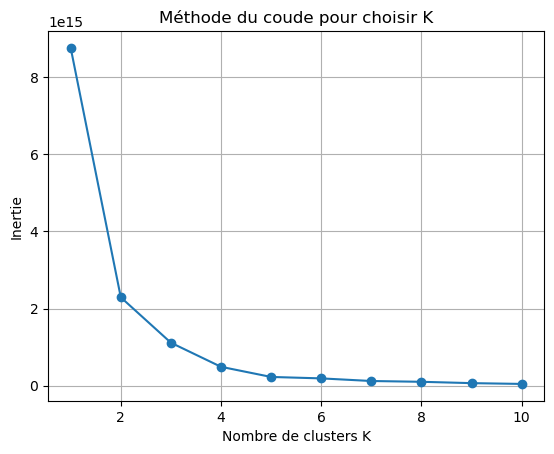

In [31]:
from sklearn.cluster import KMeans
# Calculer l'inertie pour différents K
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sample)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir K")
plt.grid(True)
plt.show()


* Le graphique montre clairement un coude autour de K = 2, ce qui indique que le nombre optimal de clusters pour l’algorithme K-Means est 2

## Clusters trouvés par KMeans

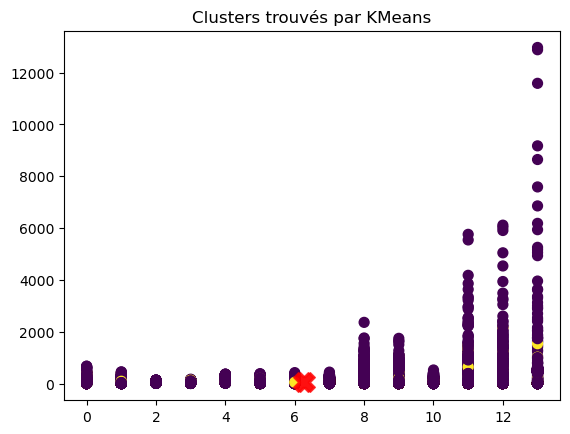

In [ ]:

# Appliquer KMeans avec K=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_sample)
y_kmeans = kmeans.predict(data_sample)

#Affichage des clusters trouvés

plt.scatter(data_sample.iloc[:, 0], data_sample.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusters trouvés par KMeans")
plt.show()


* La visualisation ci-dessus montre la répartition des données en différents clusters, chacun représenté par une couleur différente. Les centroïdes des clusters sont indiqués par des croix rouges. Cette répartition permet de visualiser comment les données sont regroupées en fonction de leur proximité, selon les caractéristiques principales extraites.



## Évaluation du nombre optimal de clusters avec le Silhouette Score

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(data_sample)
    score = silhouette_score(data_sample, y_pred)
    print(f"K = {k} -> Silhouette Score = {score:.2f}")

K = 2 -> Silhouette Score = 0.93
K = 3 -> Silhouette Score = 0.90
K = 4 -> Silhouette Score = 0.90
K = 5 -> Silhouette Score = 0.87



* Le score le plus élevé a été obtenu pour K = 2 avec une valeur de 0.93, ce qui indique que les données sont bien séparées et que les points à l’intérieur de chaque cluster sont proches les uns des autres.

* Bien que les scores pour K = 3 et K = 4 soient également bons (0.90), ils restent légèrement inférieurs à celui obtenu avec K = 2.

* Ainsi, selon ce critère, le choix optimal du nombre de clusters est 𝐾=2


##  l’analyse en composantes principales (PCA)

In [34]:
from sklearn.decomposition import PCA
# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=3) 
df_reduced = pca.fit_transform(data_sample)
# Afficher les composantes principales

print("Composantes principales:\n", pca.components_)
print("Variance expliquée par chaque composante:\n", pca.explained_variance_ratio_)


Composantes principales:
 [[ 8.42246689e-08  1.23007067e-06 -4.62422791e-08  3.13322025e-05
  -9.02578181e-07  9.99999999e-01 -2.37483506e-05 -2.53860297e-06
  -2.37875417e-06]
 [-9.57275791e-05  1.76328814e-03  3.03543784e-05  9.99777260e-01
  -2.47920765e-03 -3.08519772e-05  2.05404033e-02 -4.93607629e-04
  -3.74313595e-03]
 [ 7.43466630e-04  9.99607031e-01  2.97542049e-05 -1.18830741e-03
  -2.93637217e-04 -1.85707217e-06 -2.79948073e-02  1.44557479e-04
   3.05343887e-05]]
Variance expliquée par chaque composante:
 [9.99998799e-01 6.86324357e-07 2.98051999e-07]


###  Visualisation 3D des clusters après réduction de dimension par PCA

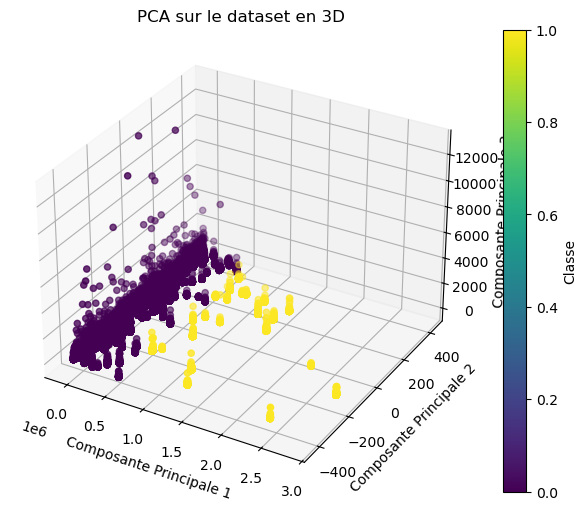

In [35]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)

df_reduced_3d = pca_3d.fit_transform(data_sample)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Use y_kmeans for coloring
ax.scatter(df_reduced_3d[:, 0], df_reduced_3d[:, 1], df_reduced_3d[:, 2], c=y_kmeans, cmap='viridis')

ax.set_title("PCA sur le dataset en 3D")
ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_zlabel("Composante Principale 3")

plt.colorbar(ax.collections[0], label='Classe')
plt.show()


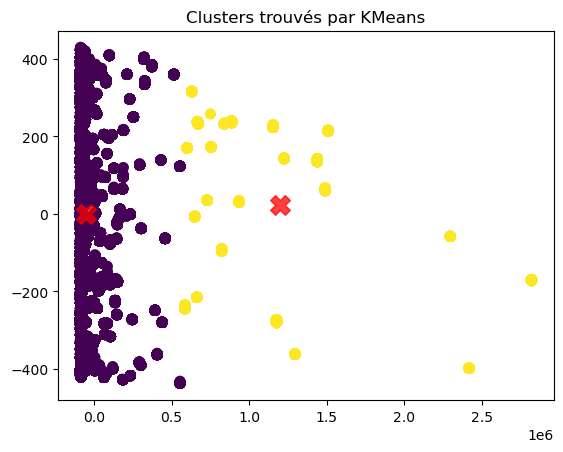

In [36]:

# Appliquer KMeans avec K=3
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_reduced)
y_kmeans = kmeans.predict(df_reduced)

# Affichage des clusters trouvés
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusters trouvés par KMeans")
plt.show()


* Résumé du graphe : l’algorithme KMeans a été utilisé pour diviser les données en deux clusters. On observe que les données se répartissent en deux groupes principaux : une forte densité de points à gauche du graphique, et un groupe plus dispersé à droite. Les croix rouges représentent les centroïdes de chaque cluster. 




In [37]:

# Calcul du score de silhouette pour K=2 à K=6
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(df_reduced)
    score = silhouette_score(df_reduced, y_pred)
    print(f"K = {k} -> Silhouette Score = {score:.2f}")


K = 2 -> Silhouette Score = 0.93
K = 3 -> Silhouette Score = 0.90
K = 4 -> Silhouette Score = 0.90
K = 5 -> Silhouette Score = 0.87


## Visualisation d'un Dendrogramme de Regroupement Hiérarchique

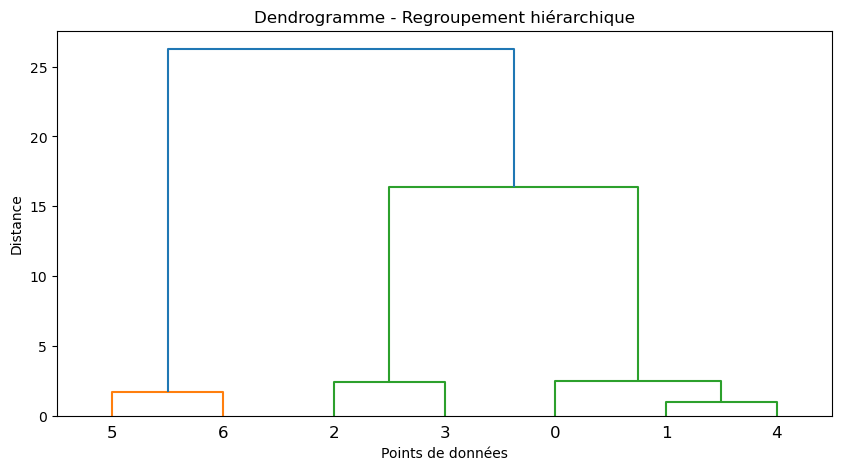

In [38]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Générer des données
X, y = make_blobs(n_samples=7, centers=3, random_state=42)

# Calcul de la matrice de liaison
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogramme - Regroupement hiérarchique")
# Tracer le dendrogramme
plt.xlabel("Points de données")
plt.ylabel("Distance")
plt.show()

* Le dendrogramme illustre la manière dont les 7 points de données sont regroupés de façon hiérarchique. On y distingue 4 groupes principaux : un groupe de 5 points, un autre de 2 points, et deux groupes isolés d’un seul point chacun. Les distances entre les branches montrent les différences de similarité entre les groupes. Ce graphique permet donc de visualiser clairement la structure de regroupement des données.


## Résumé final

* Le travail a débuté par un nettoyage complet des données (suppression des doublons, traitement des valeurs manquantes, encodage des variables).
Étant donné le volume important (+500 000 enregistrements), l’apprentissage supervisé a été réalisé sur l’ensemble complet, tandis qu’un échantillon de 100 000 a été utilisé pour l’apprentissage non supervisé afin de réduire le temps de calcul.

* Plusieurs algorithmes de classification ont été testés :

* Forêt aléatoire : 100 % (meilleur résultat)

* KNN : 97 %

* Arbre de décision : 93 %

* SVM et régression logistique : ~84 %

**La validation croisée** a confirmé la stabilité des résultats et l’absence de surapprentissage.
La méthode SelectKBest avec f_classif a permis d’identifier les 5 variables les plus pertinentes. Après réduction des dimensions, la forêt aléatoire a maintenu une précision de 98 %.

En apprentissage non supervisé, K-Means a montré que 2 clusters étaient optimaux (score de silhouette = 0,93). L’ACP n’a pas apporté d’amélioration notable.

Conclusion : Le projet couvre toutes les étapes du machine learning, de la préparation des données à l’évaluation. La forêt aléatoire est la solution optimale, et l’analyse non supervisée a offert un aperçu clair de la structure des données.